# Testing read data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data_path = '../Data/'
folder_path = 'ica_rest_close/'
if os.path.exists(data_path + folder_path):
    print('Data folder exists')

file_path = data_path + folder_path + 's000.npy'
if os.path.exists(file_path):
    print('Data file exists')
data = np.load(file_path)
print('Data shape:', data.shape)

Data folder exists
Data file exists
Data shape: (200, 1, 61, 1000)


In [3]:
data

array([[[[ 1.65980494e+00, -1.86433411e+00, -4.19658613e+00, ...,
          -1.47098675e+01, -1.27896719e+01, -9.63381481e+00],
         [-4.68788099e+00, -4.59114933e+00, -4.35748386e+00, ...,
          -1.11653376e+00, -6.41893327e-01, -6.42586410e-01],
         [-7.48739481e-01, -3.99835944e-01, -2.77986348e-01, ...,
          -2.07248735e+00, -1.61528349e+00, -1.30596292e+00],
         ...,
         [ 3.04239964e+00, -2.27559638e+00, -5.35067940e+00, ...,
          -7.04661942e+00, -6.39108372e+00, -4.43306160e+00],
         [ 4.06823277e-01, -3.72724128e+00, -6.22066641e+00, ...,
          -1.65190589e+00, -1.33899438e+00, -9.96090949e-01],
         [-2.80933070e+00, -1.51847231e+00, -7.91693389e-01, ...,
           2.90837884e-01,  4.91730124e-01,  3.55539322e-02]]],


       [[[ 2.42323369e-01, -3.58404112e+00, -5.94965076e+00, ...,
           1.05356038e+00,  9.89365399e-01,  6.35698378e-01],
         [ 2.03123689e+00,  3.41404629e+00,  4.51461220e+00, ...,
          -3.3605344

Parameters

In [4]:
rest_ch_ls = ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3',
                'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6',
                'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5',
                'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz',
                'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2']
sampling_rate = 250 # Hz

## s data

In [5]:
# Remove the singleton dimension (channel)
data_squeeze = data.squeeze(1)  # Shape becomes (200, 61, 1000)

# Reshape to long format: (trial, electrode, time)
n_trials, n_channel, n_timepoints = data_squeeze.shape
reshaped = data_squeeze.reshape(n_trials * n_channel, n_timepoints)

# Create a MultiIndex for the rows
trials = np.repeat(np.arange(n_trials), n_channel)
channel = np.tile(np.arange(n_channel), n_trials)
index = pd.MultiIndex.from_arrays([trials, channel+1], names=['trial', 'channel'])

# Create DataFrame
df = pd.DataFrame(reshaped, index=index, columns=[f't{t}' for t in range(n_timepoints)])

print(df.head(5))

                     t0        t1        t2        t3        t4        t5  \
trial channel                                                               
0     1        1.659805 -1.864334 -4.196586 -4.813888 -3.951186 -2.371591   
      2       -4.687881 -4.591149 -4.357484 -3.800369 -2.914582 -1.928354   
      3       -0.748739 -0.399836 -0.277986 -0.345219 -0.508039 -0.686571   
      4        4.572001 -1.036967 -5.064140 -6.620195 -5.926163 -4.063624   
      5        4.022326  3.297768  2.798047  2.719106  3.285750  4.491354   

                     t6        t7        t8        t9  ...      t990  \
trial channel                                          ...             
0     1       -0.855575  0.137028  0.457487  0.169140  ... -7.368875   
      2       -1.127030 -0.640544 -0.329422  0.105957  ... -4.575178   
      3       -0.797697 -0.759696 -0.473528  0.105431  ... -2.506160   
      4       -2.319449 -1.557693 -1.997894 -3.321805  ... -1.574528   
      5        5.962401  7.0

In [6]:
def get_gfp(data_array):
    """
    Calculate the Global Field Power (GFP) for the given data array.
    
    Parameters:
    data_array (numpy.ndarray): 2D array of shape (n_channels, n_timepoints)
    
    Returns:
    numpy.ndarray: 1D array of GFP values
    """
    return np.std(data_array, axis=0)

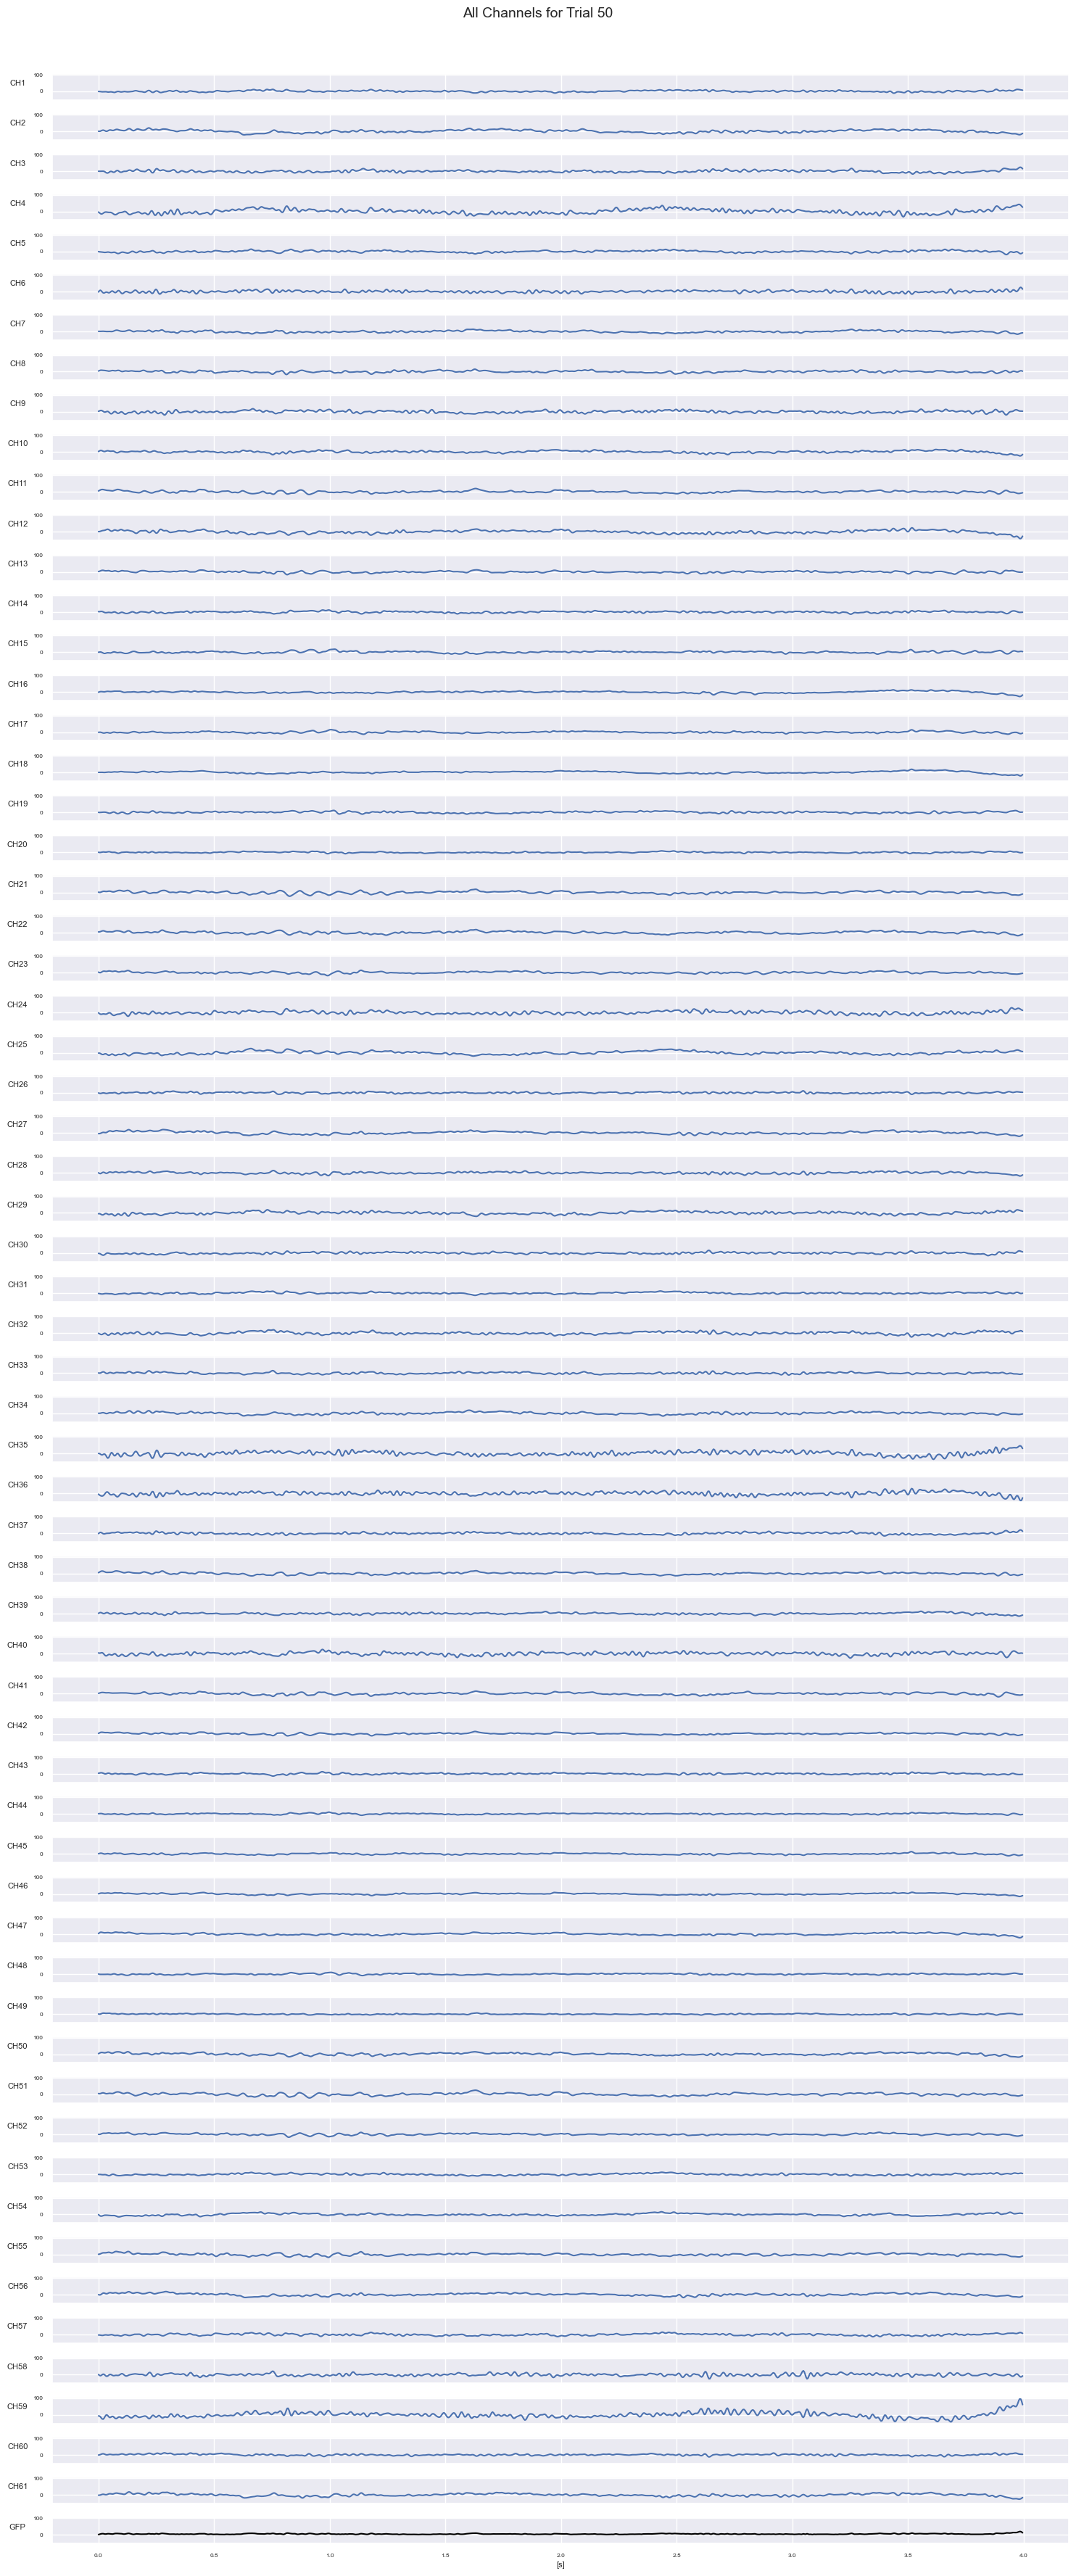

In [7]:
# Set the trial number
nt_trial = 50  # Change as needed

# Extract the trial data from the wide-format DataFrame
df_trial = df.loc[nt_trial]  # shape: (61 channels, 1000 time points)

# Convert timepoint labels ('t0', 't1', ...) to integers
timepoints = [int(col[1:]) for col in df_trial.columns]
# get timepoints know the sampling rate
timepoints = np.arange(0, len(timepoints)) / sampling_rate  # Convert to seconds
data_array = df_trial.values  # shape: (61, 1000)
gfp = get_gfp(data_array)
# Create subplots: shared y-axis, reduced height
fig, axes = plt.subplots(
    nrows=62,
    ncols=1,
    figsize=(15, 0.6 * 61),  # smaller height per plot
    sharex=True,
    sharey=True
)

# Plot each channel
for ch in range(61):
    ax = axes[ch]
    ax.plot(timepoints, data_array[ch])
    ax.set_ylabel(f'CH{ch+1}', rotation=0, labelpad=15, fontsize=8)
    ax.tick_params(axis='y', labelsize=6)
    
ax = axes[61]
ax.plot(timepoints, gfp, color='black', linewidth=1.5)
ax.set_ylabel('GFP', rotation=0, labelpad=15, fontsize=8)
ax.tick_params(axis='y', labelsize=6)
ax.set_xlabel('[s]', fontsize=8)
ax.tick_params(axis='x', labelsize=6)

    # # Hide x-axis ticks for all but the last subplot
    # if ch < 60:
    #     ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    # else:
        # ax.set_xlabel('Time Points')

# Overall title and layout
plt.suptitle(f'All Channels for Trial {nt_trial}', fontsize=14)
plt.tight_layout(rect=[0, 0.01, 1, 0.97])  # leave space for title
plt.show()

In [ ]:
# Example data: replace with your actual EEG data
n_trials = 10
n_channels = 61
timepoints = 1000
eeg_data = np.random.randn(n_trials, 1, n_channels, timepoints)

# Remove the singleton dimension
eeg_data = eeg_data[:, 0, :, :]  # shape: (n_trials, n_channels, timepoints)

# Concatenate trials along the time axis
# Resulting shape: (n_channels, n_trials * timepoints)
eeg_concat = eeg_data.transpose(1, 0, 2).reshape(n_channels, -1)

# Plotting
fig, axes = plt.subplots(n_channels, 1, figsize=(12, n_channels * 1), sharex=True)
fig.tight_layout(pad=0.2)  # minimal vertical padding

for ch in range(n_channels):
    ax = axes[ch]
    sns.lineplot(data=eeg_concat[ch], ax=ax, linewidth=0.5)
    ax.set_ylabel(f'Ch {ch+1}', rotation=0, labelpad=20)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks([])

axes[-1].set_xticks(np.linspace(0, eeg_concat.shape[1], 10))
axes[-1].set_xticklabels([f'{int(t)}' for t in np.linspace(0, eeg_concat.shape[1], 10)])
axes[-1].set_xlabel('Time (samples)')

plt.subplots_adjust(hspace=0.1)
plt.show()


GFP shape: (1000,)


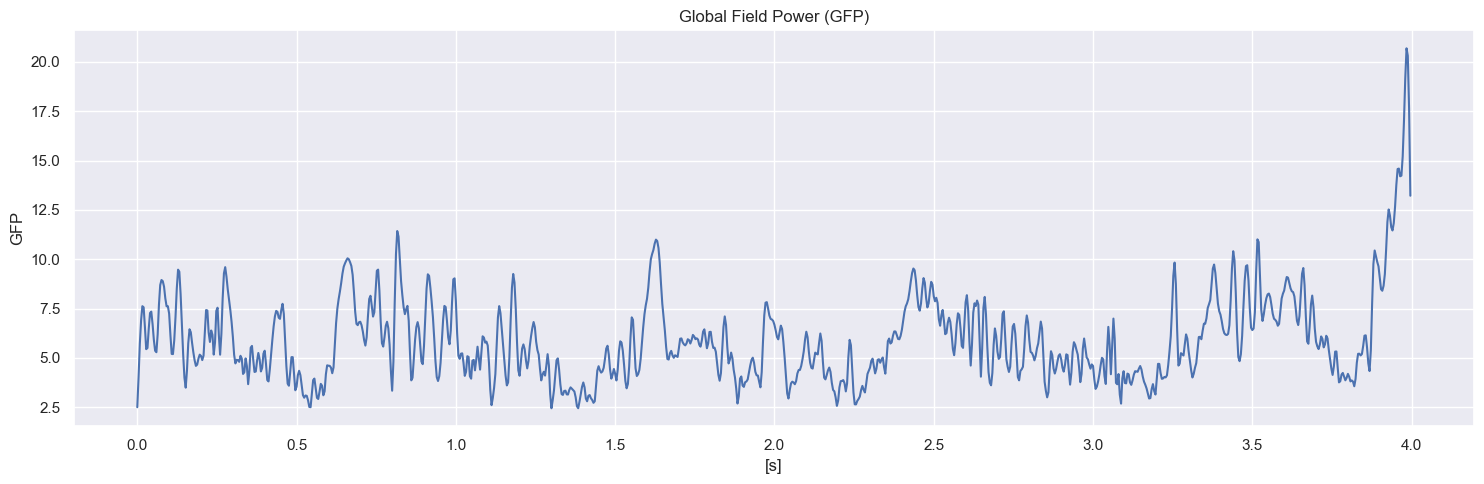

In [8]:
gfp = get_gfp(data_array)
print('GFP shape:', gfp.shape)
plt.figure(figsize=(15, 5))
plt.plot(timepoints, gfp)
plt.title('Global Field Power (GFP)')
plt.xlabel('[s]')
plt.ylabel('GFP')   
plt.tight_layout()
plt.show()

## Extracting local maximals of GFP

Peaks: [  4  11  19  24  32  41  49  54  58  63  69  78  81  85  90  95 100 109
 114 121 127 132 139 144 149 165 175 183 189 196 204 212 220 228 241 249
 255 259 264 267 271 274 284 295 303 311 319 322 330 336 340 350 355 362
 369 374 379 388 407 419 422 427 432 436 439 445 450 453 461 466 474 483
 494 505 514 525 532 536 543 554 559 569 577 582 585 590 594 609 617 623
 627 632 637 644 651 659 665 673 680 688 698 709 717 724 729 735 743 749
 757 762 766 770 774 777 783 787 797 801 806 814 819 823 834 837 845 860
 871 879 888 902 915 922 929 933 941 946 950 953 959 964 971 982 990 996]


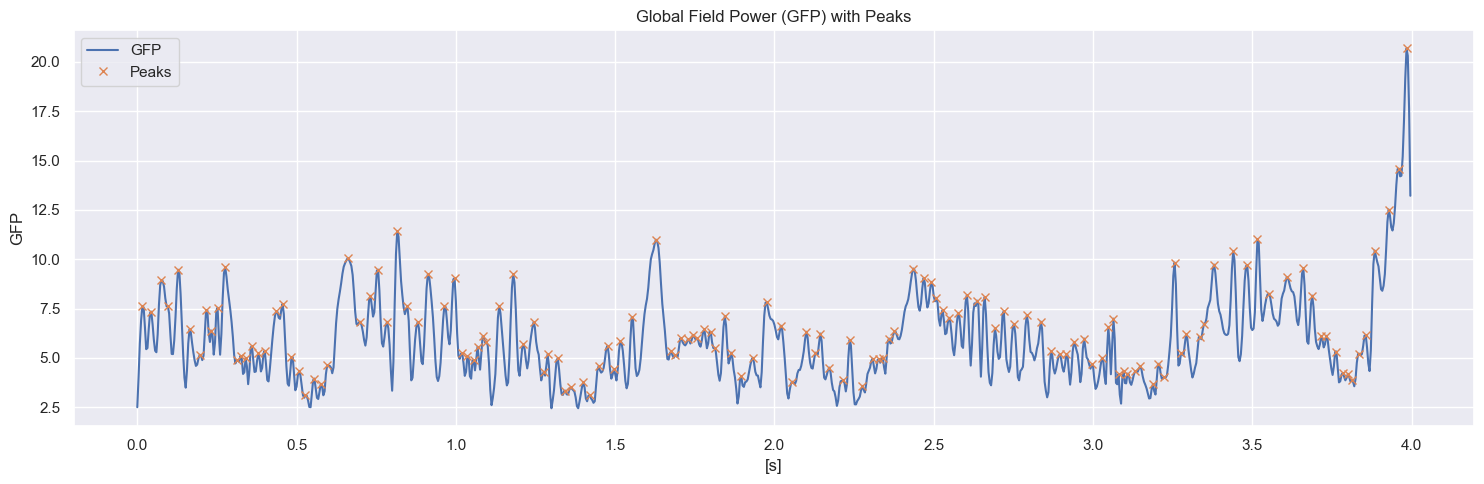

In [9]:
from scipy.signal import find_peaks
# Find peaks in the GFP signal but only within 10ms window
distance_10 = 0.01 * sampling_rate  # 10ms in samples
# peaks_10, _ = find_peaks(gfp, distance=distance_10)  # Adjust height as needed


peaks, _ = find_peaks(gfp, distance= distance_10)  # Adjust height as needed
print('Peaks:', peaks)
gfp_local_max = gfp[peaks]
gfp_timepoints = timepoints[peaks]
# gfp_10_local_max = gfp[peaks_10]
# gfp_10_timepoints = timepoints[peaks_10]
# Plot the GFP signal with peaks

plt.figure(figsize=(15, 5))
plt.plot(timepoints, gfp, label='GFP')
plt.plot(gfp_timepoints, gfp_local_max, "x", label='Peaks')
# plt.plot(gfp_10_timepoints, gfp_10_local_max, "o", label='Peaks (10ms)')
plt.title('Global Field Power (GFP) with Peaks')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.legend()
plt.tight_layout()
plt.show()


## Kmeans cluster

In [10]:
from sklearn.cluster import KMeans

In [11]:
# 3. Get maps at peaks
topographies = data_array[:, peaks].T  # shape: (n_peaks, n_channels)

# 4. Normalize and ignore polarity
topographies = topographies / np.linalg.norm(topographies, axis=1, keepdims=True)
topographies = np.abs(topographies)  # or align polarity consistently

# 5. KMeans clustering (e.g., 4 microstates)
kmeans = KMeans(n_clusters=4, random_state=0).fit(topographies)
labels = kmeans.labels_  # microstate label for each GFP peak



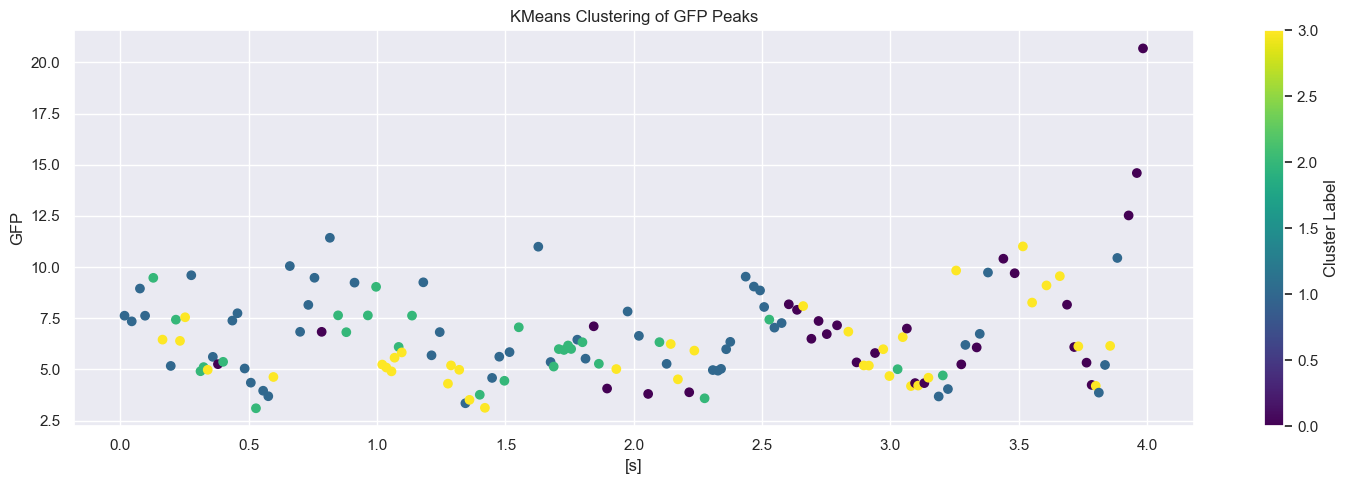

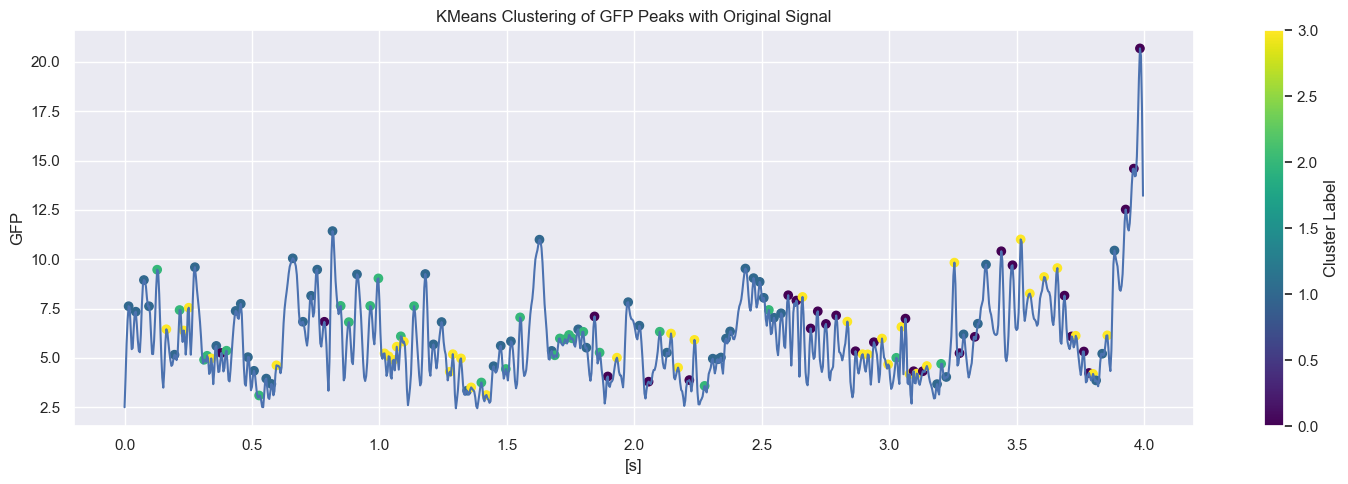

In [12]:
# Reshape the data for clustering
# X = np.column_stack((peaks, gfp_local_max))
# X = np.array(gfp_local_max).reshape(-1, 1)
# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
# # Get cluster labels
# labels = kmeans.labels_
# Plot the clusters
plt.figure(figsize=(15, 5))
plt.scatter(gfp_timepoints, gfp_local_max, c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering of GFP Peaks')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()
# Plot the clusters with the original GFP signal
plt.figure(figsize=(15, 5))
plt.plot(timepoints, gfp, label='GFP')
plt.scatter(gfp_timepoints, gfp_local_max, c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering of GFP Peaks with Original Signal')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()




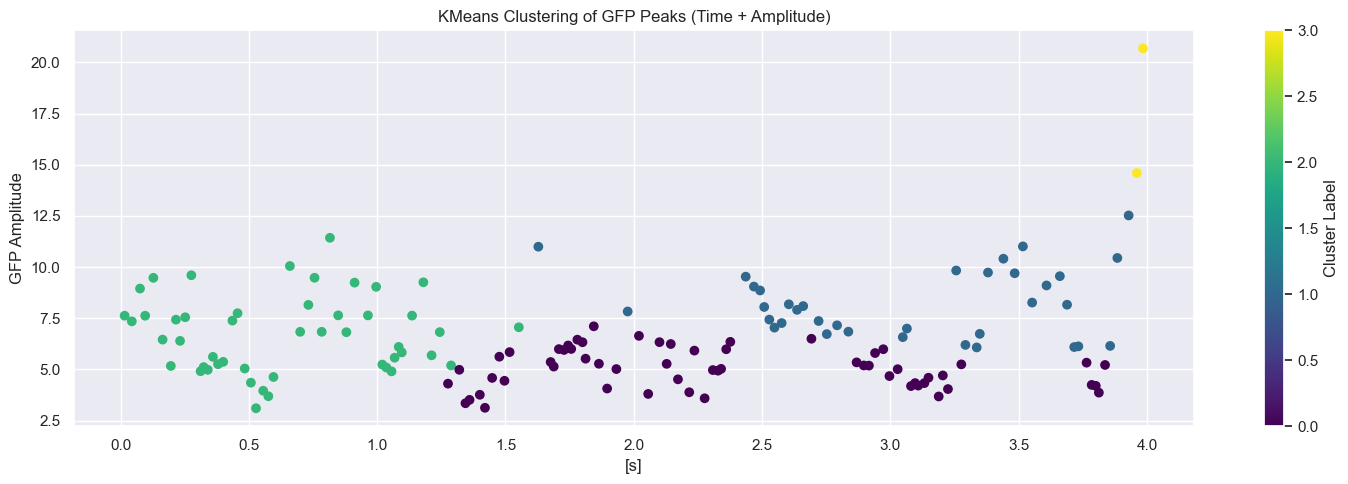

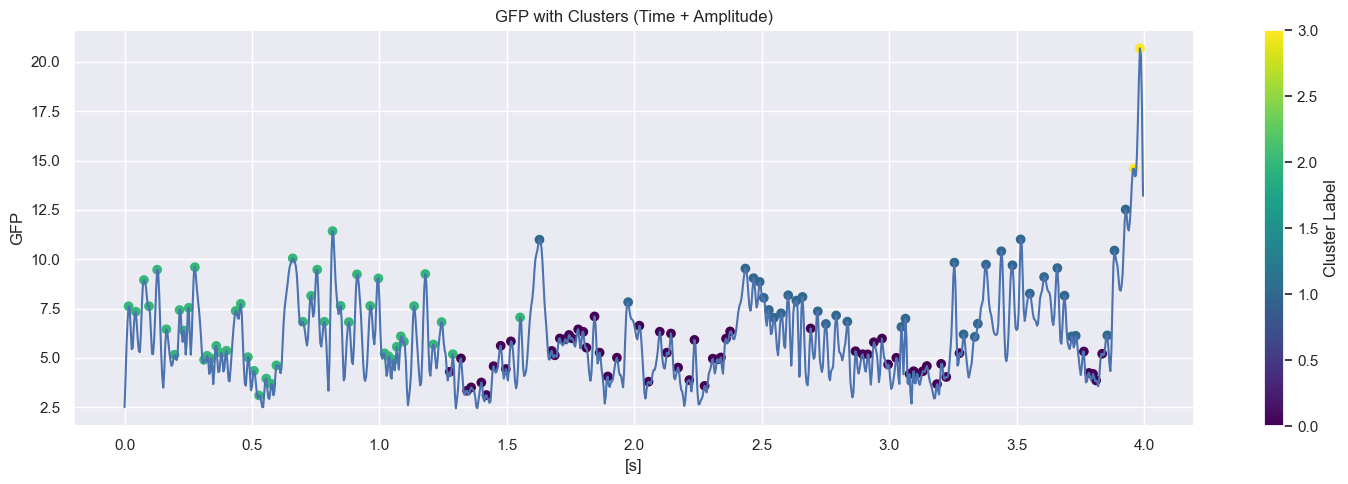

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Stack time and amplitude
X = np.column_stack((peaks, gfp_local_max))

# Normalize both features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(15, 5))
plt.scatter(gfp_timepoints, gfp_local_max, c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering of GFP Peaks (Time + Amplitude)')
plt.xlabel('[s]')
plt.ylabel('GFP Amplitude')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()

# Overlay on original signal
plt.figure(figsize=(15, 5))
plt.plot(timepoints, gfp, label='GFP')
plt.scatter(gfp_timepoints, gfp_local_max, c=labels, cmap='viridis', marker='o')
plt.title('GFP with Clusters (Time + Amplitude)')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()


In [14]:
cluster_templates = kmeans.cluster_centers_
print('Cluster templates shape:', cluster_templates[0].shape)

Cluster templates shape: (2,)


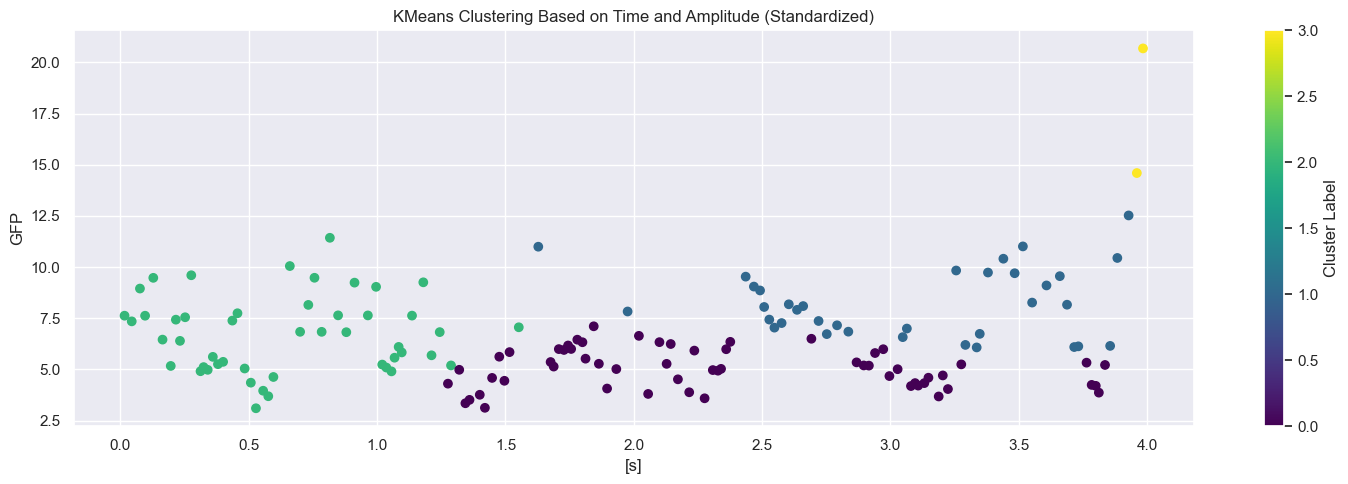

In [15]:
from sklearn.preprocessing import StandardScaler

# Stack both features
X = np.column_stack((peaks, gfp_local_max))

# Standardize both dimensions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans on scaled features
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(15, 5))
plt.scatter(gfp_timepoints, gfp_local_max, c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering Based on Time and Amplitude (Standardized)')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()


### Finding best k cluster

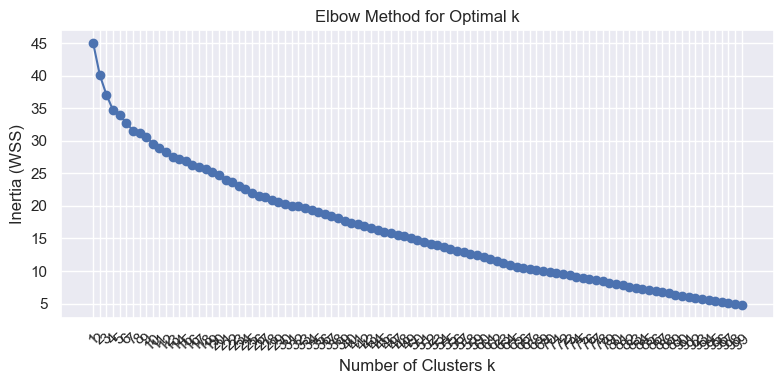

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 100)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(topographies)  # Use normalized data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia (WSS)')
plt.xticks(K_range, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Minimum Silhouette Score: 0.04258614 for k = 18


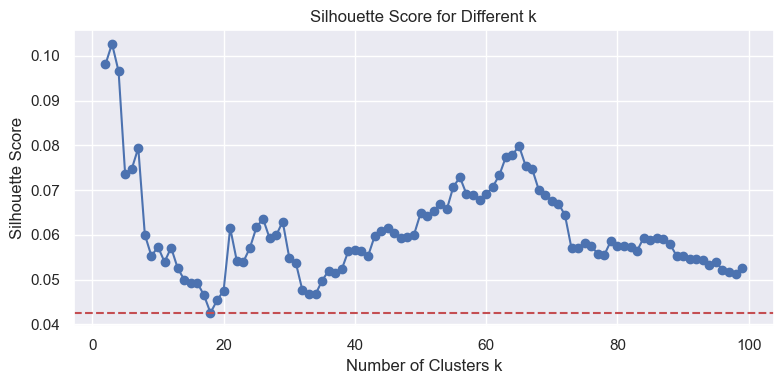

In [17]:
from sklearn.metrics import silhouette_score

sil_scores = []
max_k = 100
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(topographies)
    score = silhouette_score(topographies, kmeans.labels_)
    sil_scores.append(score)
min_silhouette = min(sil_scores)
print('Minimum Silhouette Score:', min_silhouette, 'for k =', sil_scores.index(min_silhouette) + 2)
# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k), sil_scores, marker='o')
plt.axhline(y=min_silhouette, color='r', linestyle='--', label=f'Min Silhouette: {min_silhouette:.2f}')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
def get_gmd(data_array, gfp, u_ind, v_ind):
    """
    Calculate the Global Mean Dissimilarity (GMD) between two maps for the given data array.
    
    Parameters:
    data_array (numpy.ndarray): 2D array of shape (n_channels, n_timepoints)
    gfp (numpy.ndarray): 1D array of GFP values
    u_ind (int): Index of the first map
    v_ind (int): Index of the second map
    
    Returns:
    double: GMD value
    """
    u = data_array[:, u_ind]
    v = data_array[:, v_ind]
    u_mean = np.mean(u)
    v_mean = np.mean(v)
    u_GFP = gfp[u_ind]
    v_GFP = gfp[v_ind]
    return np.sqrt(np.sum(((u - u_mean)/u_GFP - (v - v_mean)/v_GFP)**2)/data_array.shape[0])

In [19]:
gmd = get_gmd(data_array, gfp, 0, 1)
print('GMD between first two channels:', gmd)
# create matrix of GMD
n_maps = data_array.shape[1]
gmd_matrix = np.zeros((n_maps, n_maps))
for i in range(n_maps):
    for j in range(n_maps):
        if i == j:
            gmd_matrix[i, j] = 0
        else:
            gmd_matrix[i, j] = get_gmd(data_array, gfp, i, j)
print('GMD matrix shape:', gmd_matrix.shape)

GMD between first two channels: 0.6078211
GMD matrix shape: (1000, 1000)


In [20]:
# label the matrix
gmd_df = pd.DataFrame(gmd_matrix, index=timepoints, columns=timepoints)
print(gmd_df.head(5))

          0.000     0.004     0.008     0.012     0.016     0.020     0.024  \
0.000  0.000000  0.607821  0.665464  0.576942  0.547013  0.613891  0.727053   
0.004  0.607821  0.000000  0.148569  0.345462  0.588617  0.775488  0.883477   
0.008  0.665464  0.148569  0.000000  0.252984  0.523963  0.726864  0.843291   
0.012  0.576942  0.345462  0.252984  0.000000  0.281222  0.502658  0.650994   
0.016  0.547013  0.588617  0.523963  0.281222  0.000000  0.235456  0.425670   

          0.028     0.032     0.036  ...     3.960     3.964     3.968  \
0.000  0.895349  1.078357  1.133750  ...  1.610933  1.643546  1.688990   
0.004  0.943540  1.015537  1.062234  ...  1.579831  1.626466  1.685851   
0.008  0.902230  0.964822  0.998937  ...  1.622719  1.668668  1.726495   
0.012  0.774325  0.907556  0.948760  ...  1.689693  1.731015  1.784409   
0.016  0.647625  0.881636  0.947733  ...  1.734320  1.768418  1.814457   

          3.972     3.976     3.980     3.984     3.988     3.992     3.996  
0.

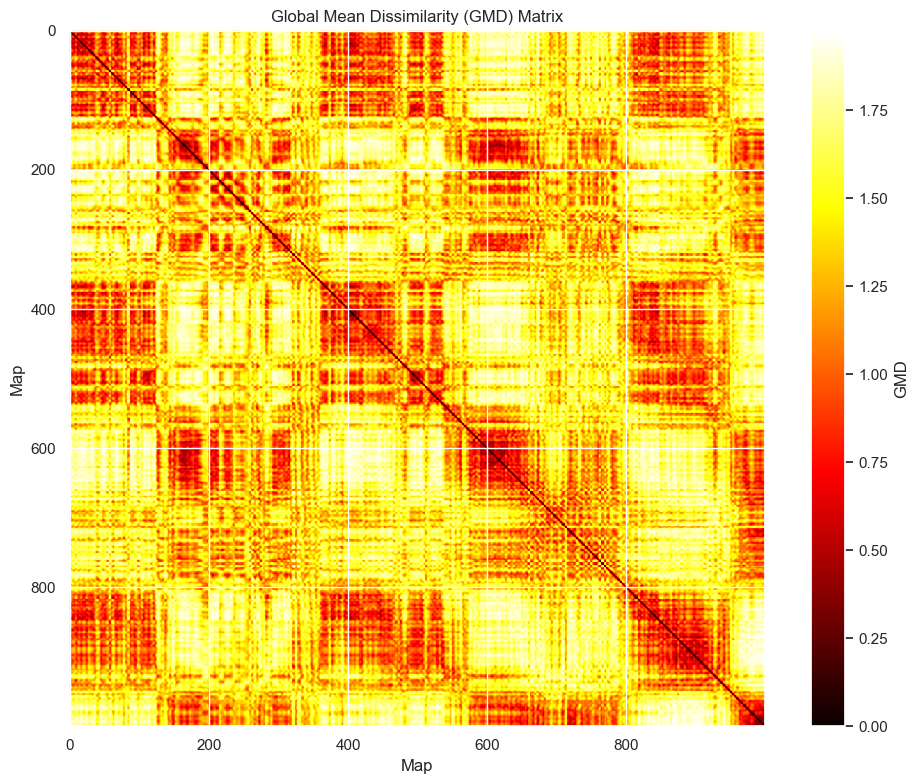

In [21]:
# plot matrix
plt.figure(figsize=(10, 8))
plt.imshow(gmd_df, cmap='hot', interpolation='nearest')
plt.colorbar(label='GMD')
plt.title('Global Mean Dissimilarity (GMD) Matrix')
plt.xlabel('Map')
plt.ylabel('Map')
plt.tight_layout()
plt.show()

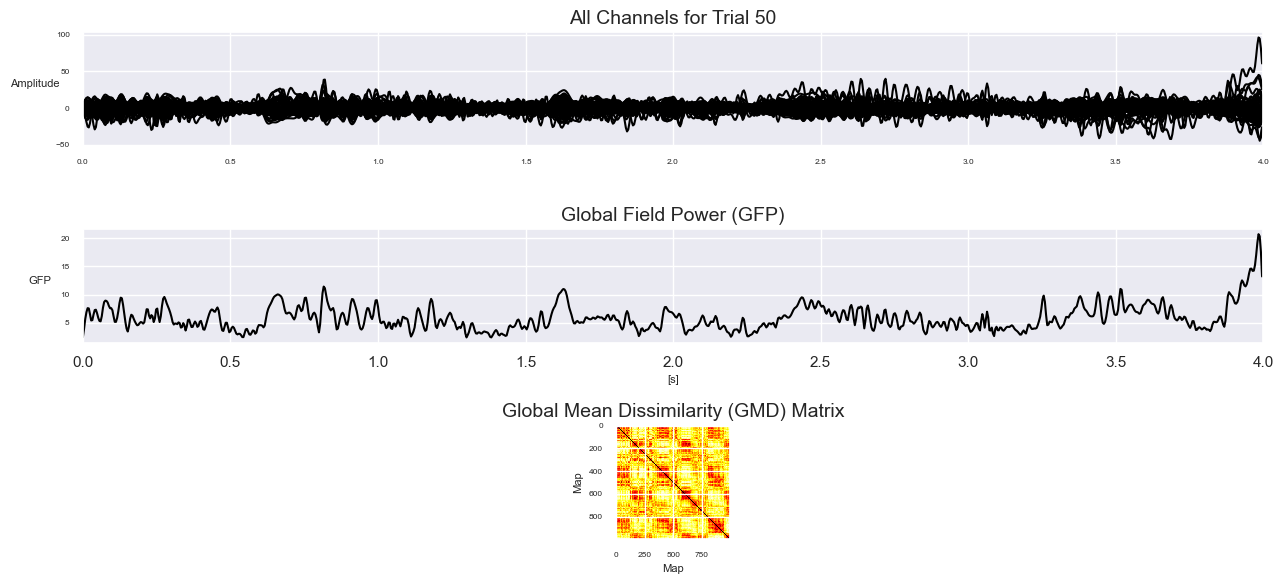

In [22]:
# plot all eeg channels, gfp and gmd matirx in 1 subplot
fig, axes = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(13,6),  # smaller height per plot
    
)
axes[0].set_title(f'All Channels for Trial {nt_trial}', fontsize=14)
for ch in range(61):
    axes[0].plot(timepoints, data_array[ch], label=f'CH{ch+1}', color='black')
axes[0].set_ylabel('Amplitude', rotation=0, labelpad=15, fontsize=8)
axes[0].tick_params(axis='y', labelsize=6)
axes[0].tick_params(axis='x', labelsize=6)
axes[0].set_xlim([0, 4])



axes[1].plot(timepoints, gfp, color='black', linewidth=1.5)
axes[1].set_ylabel('GFP', rotation=0, labelpad=15, fontsize=8) 
axes[1].tick_params(axis='y', labelsize=6)
axes[1].set_xlabel('[s]', fontsize=8)
axes[1].set_title('Global Field Power (GFP)', fontsize=14)
axes[1].set_xlim([0, 4])
# plot gmd matrix

axes[2].imshow(gmd_df, cmap='hot', interpolation='nearest')
axes[2].set_title('Global Mean Dissimilarity (GMD) Matrix', fontsize=14)
axes[2].set_xlabel('Map', fontsize=8)
axes[2].set_ylabel('Map', fontsize=8)
axes[2].tick_params(axis='x', labelsize=6)
axes[2].tick_params(axis='y', labelsize=6)
plt.tight_layout()
plt.show()


## Get GFP on 1 subject over all trials

In [23]:
# Extract the trial data from the wide-format DataFrame
all_gfp = []
for nt_trial in range(data.shape[0]):
    df_trial = df.loc[nt_trial]  # shape: (61 channels, 1000 time points)

    # Convert timepoint labels ('t0', 't1', ...) to integers
    timepoints = [int(col[1:]) for col in df_trial.columns]
    # get timepoints know the sampling rate
    timepoints = np.arange(0, len(timepoints)) / sampling_rate  # Convert to seconds
    data_array = df_trial.values  # shape: (61, 1000)
    gfp = get_gfp(data_array)
    all_gfp.append(gfp)
print('GFP shape:', np.array(all_gfp).shape)  # (200, 1000)

GFP shape: (200, 1000)


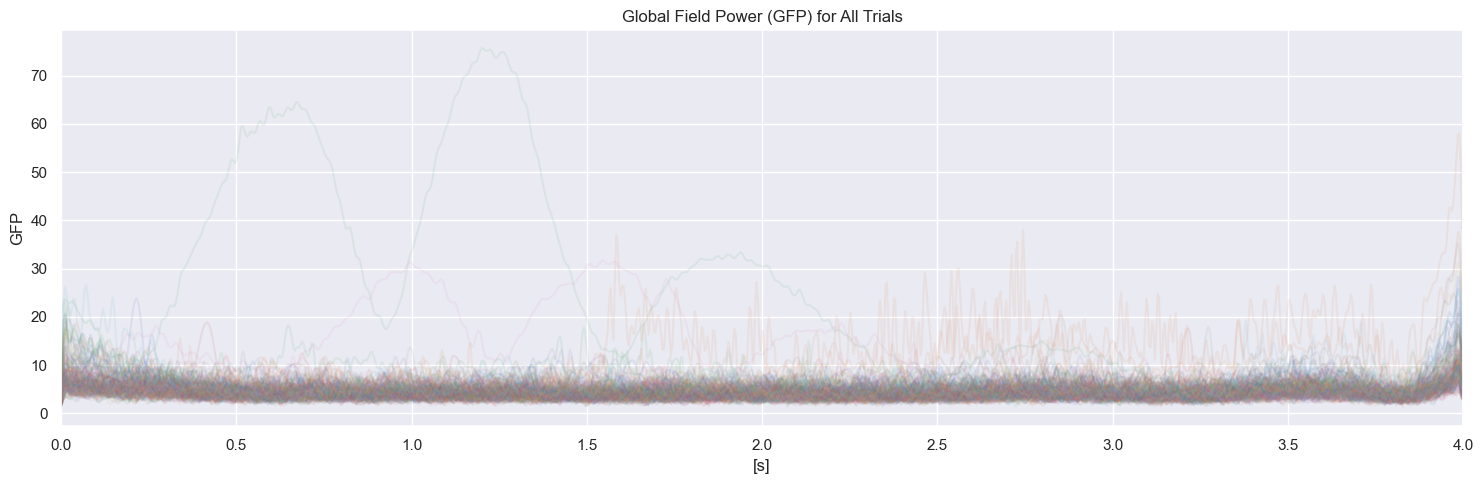

In [24]:
# plot all gfp
plt.figure(figsize=(15, 5))
plt.plot(timepoints, np.array(all_gfp).T, alpha=0.1)
plt.title('Global Field Power (GFP) for All Trials')
plt.xlabel('[s]')
plt.ylabel('GFP')
plt.xlim([0, 4])
plt.tight_layout()
plt.show()


## Get k cluster on all trials for 1 subject using kmeans

In [25]:
# get peaks for all trials
all_peaks = []
all_shapes = []
all_gfp_local_max = []
all_gfp_timepoints = []
for nt_trial in range(data.shape[0]):
    gfp = all_gfp[nt_trial]
    peaks, _ = find_peaks(gfp, distance= distance_10)  # Adjust height as needed
    gfp_local_max = gfp[peaks]
    gfp_timepoints = timepoints[peaks]
    all_peaks.append(peaks)
    all_shapes.append(peaks.shape)
    all_gfp_local_max.append(gfp_local_max)
    all_gfp_timepoints.append(gfp_timepoints)
print('Shapes of peaks:', all_shapes)  # [(n_peaks,)]
print('All peaks shape:', np.array(all_shapes).shape)  # (200, n_peaks)

Shapes of peaks: [(146,), (150,), (136,), (134,), (144,), (174,), (166,), (139,), (141,), (147,), (137,), (138,), (138,), (140,), (125,), (137,), (135,), (134,), (134,), (136,), (132,), (136,), (130,), (175,), (160,), (136,), (159,), (142,), (147,), (153,), (146,), (139,), (136,), (140,), (163,), (162,), (154,), (150,), (157,), (141,), (155,), (163,), (142,), (157,), (147,), (146,), (149,), (160,), (156,), (157,), (144,), (148,), (146,), (145,), (143,), (146,), (158,), (151,), (145,), (162,), (128,), (151,), (152,), (131,), (124,), (134,), (126,), (119,), (130,), (136,), (136,), (159,), (142,), (148,), (147,), (153,), (178,), (144,), (157,), (169,), (171,), (160,), (137,), (141,), (133,), (158,), (157,), (128,), (146,), (152,), (143,), (146,), (180,), (162,), (161,), (162,), (158,), (146,), (157,), (154,), (150,), (155,), (139,), (133,), (182,), (146,), (141,), (151,), (154,), (141,), (129,), (135,), (135,), (130,), (132,), (138,), (98,), (134,), (119,), (146,), (158,), (173,), (150,),

In [26]:
data_array.shape

(61, 1000)

In [27]:
all_topographies = []
all_combined_peaks = []
for nt_trial in range(data.shape[0]):
    df_trial = df.loc[nt_trial]  # shape: (61 channels, 1000 time points)
    data_array = df_trial.values  # shape: (61, 1000)
    topographies = data_array[:, all_peaks[nt_trial]].T  # shape: (n_peaks, n_channels)
    all_topographies.append(topographies)
# fuse all topographies
all_topographies = np.concatenate(all_topographies, axis=0)  # shape: (n_trials * n_peaks, n_channels)
print('Topographies shape:', np.array(all_topographies).shape)  # (200, n_peaks, 61)

Topographies shape: (29297, 61)


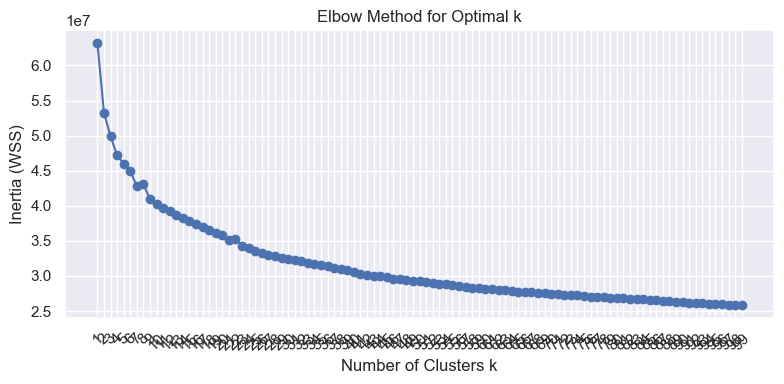

In [28]:
inertia = []
K_range = range(1, 100)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(all_topographies)  # Use normalized data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia (WSS)')
plt.xticks(K_range, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Minimum Silhouette Score: 0.035044007 for k = 95


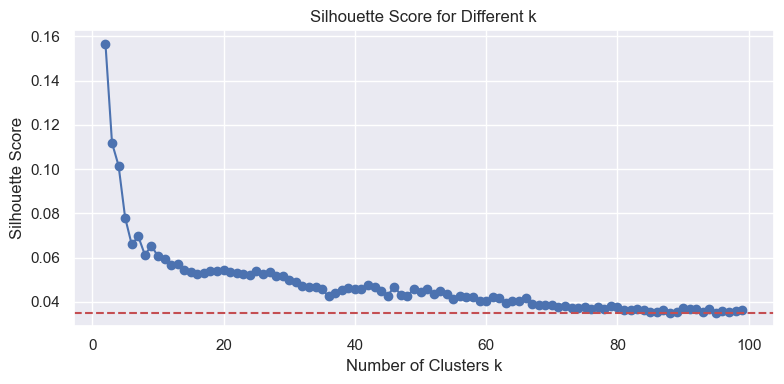

In [29]:
sil_scores = []
max_k = 100
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(all_topographies)
    score = silhouette_score(all_topographies, kmeans.labels_)
    sil_scores.append(score)
min_silhouette = min(sil_scores)
print('Minimum Silhouette Score:', min_silhouette, 'for k =', sil_scores.index(min_silhouette) + 2)
# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_k), sil_scores, marker='o')
plt.axhline(y=min_silhouette, color='r', linestyle='--', label=f'Min Silhouette: {min_silhouette:.2f}')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
np.concatenate(all_gfp).shape

(200000,)

In [31]:
# 5. KMeans clustering (e.g., 4 microstates)
kmeans = KMeans(n_clusters=4, random_state=0).fit(all_topographies)
labels = kmeans.labels_  # microstate label for each GFP peak

all_gfp_combine = np.concatenate(all_gfp, axis=0)
print('All GFP shape:', all_gfp_combine.shape)  # (200, 1000)
all_peaks_combine, _ = find_peaks(all_gfp_combine, distance= distance_10)  # Adjust height as needed
print('All peaks shape:', np.array(all_peaks_combine).shape)  # (200, n_peaks)

all_timepoints = np.arange(0, len(all_gfp_combine)) / sampling_rate  # Convert to seconds

# # plot gfp with labels
# plt.figure(figsize=(15, 5))
all_timepoints = np.arange(0, len(all_gfp_combine)) / sampling_rate  # Convert to seconds
# plt.plot(all_timepoints, all_gfp_combine, color='black', linewidth=1.5)
# plt.xlabel('[s]')
# plt.ylabel('GFP')
# plt.title('Global Field Power (GFP) with Clusters')

# # plt.plot(np.concatenate(all_gfp))
# plt.scatter(all_timepoints[all_peaks_combine], np.concatenate(all_gfp_local_max), c=labels, cmap='viridis', marker='o')




All GFP shape: (200000,)
All peaks shape: (29297,)


In [32]:
all_topographies = []
all_combined_peaks = []
for nt_trial in range(data.shape[0]):
    df_trial = df.loc[nt_trial]  # shape: (61 channels, 1000 time points)
    data_array = df_trial.values  # shape: (61, 1000)
    topographies = data_array.T  # shape: (n_peaks, n_channels)
    all_topographies.append(topographies)
# fuse all topographies
all_topographies = np.concatenate(all_topographies, axis=0)  # shape: (n_trials * n_peaks, n_channels)
print('Topographies shape:', np.array(all_topographies).shape)  # (200, n_peaks, 61)

Topographies shape: (200000, 61)


In [33]:
def get_microstate_labels(all_topographies, cluster_templates, all_gfp_combine, position=0):
    """
    Get microstate labels for each topography.      
    
    Parameters:
    all_topographies (numpy.ndarray): 2D array of shape (n_peaks, n_channels)
    cluster_templates (numpy.ndarray): 2D array of shape (n_clusters, n_channels)
    all_gfp_combine (numpy.ndarray): 1D array of GFP values for all datapoints

    Returns:
    numpy.ndarray: Array of microstate labels
    """
    # get cluster templates
    gmd_values = []
    for i in range(cluster_templates.shape[0]):
        gmd = get_gmd(all_topographies.T, all_gfp_combine, position, i)
        gmd_values.append(gmd)
    gmd_values = np.array(gmd_values)
    gmd_labels = np.argmin(gmd_values, axis=0)  # shape: (n_peaks,)

    return gmd_labels, gmd_values

In [34]:
cluster_templates = kmeans.cluster_centers_
print('Cluster templates shape:', cluster_templates.shape)

Cluster templates shape: (4, 61)


In [35]:
all_microstate_labels = []
all_gmd_values = []
for i in range(len(all_topographies)):
    gmd_labels, gmd_values = get_microstate_labels(all_topographies, cluster_templates, all_gfp_combine, position=i)
    all_microstate_labels.append(gmd_labels)
    all_gmd_values.append(gmd_values)
all_microstate_labels = np.array(all_microstate_labels)  # shape: (n_peaks, n_trials)
print('All microstate labels shape:', all_microstate_labels.shape)  # (n_peaks, n_trials)
all_gmd_values = np.array(all_gmd_values)  # shape: (n_peaks, n_trials)
print('All GMD values shape:', all_gmd_values.shape)  # (n_peaks, n_trials)

All microstate labels shape: (200000,)
All GMD values shape: (200000, 4)


In [36]:
# Reshape to (n_trials, timepoints)
all_microstate_labels_reshaped = all_microstate_labels.reshape(data.shape[0], -1)  # (200, n_peaks)
all_microstate_labels_reshaped.shape
# Reshape GMD values to (n_trials, n_template, timepoints)
all_gmd_values_reshaped = reshaped = all_gmd_values.reshape(200, 1000, 4).transpose(0, 2, 1)

print('All GMD values reshaped shape:', all_gmd_values_reshaped.shape)  # (200, n_peaks)

All GMD values reshaped shape: (200, 4, 1000)


In [37]:
all_gfp = np.array(all_gfp)
print('All GFP shape:', all_gfp.shape)  # (200, 1000)

All GFP shape: (200, 1000)


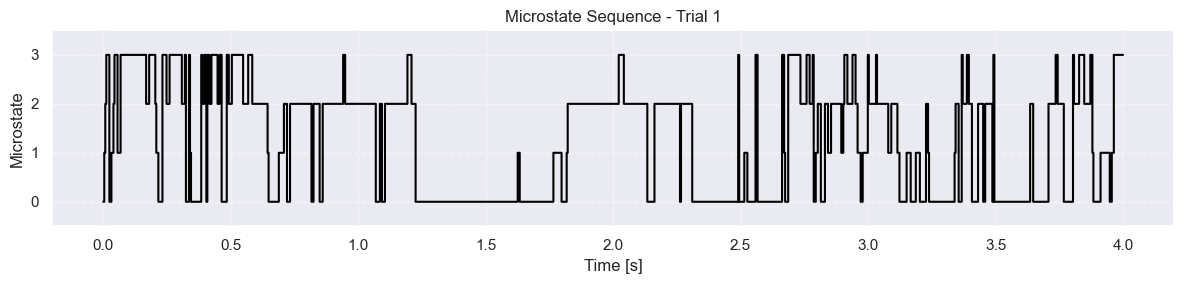

In [38]:
# Assuming all_microstate_labels_reshaped is already defined with shape (200, 1000)
# Example: all_microstate_labels_reshaped = np.load("your_data.npy")

# Time vector (0 to 4 seconds, 1000 points)
time = np.linspace(0, 4, 1000)

# Select the first trial
first_trial_labels = all_microstate_labels_reshaped[0]

# Plot
plt.figure(figsize=(12, 3))
plt.step(time, first_trial_labels, where='post', color='black')
plt.yticks([0, 1, 2, 3])
plt.ylim(-0.5, 3.5)
plt.xlabel('Time [s]')
plt.ylabel('Microstate')
plt.title('Microstate Sequence - Trial 1')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

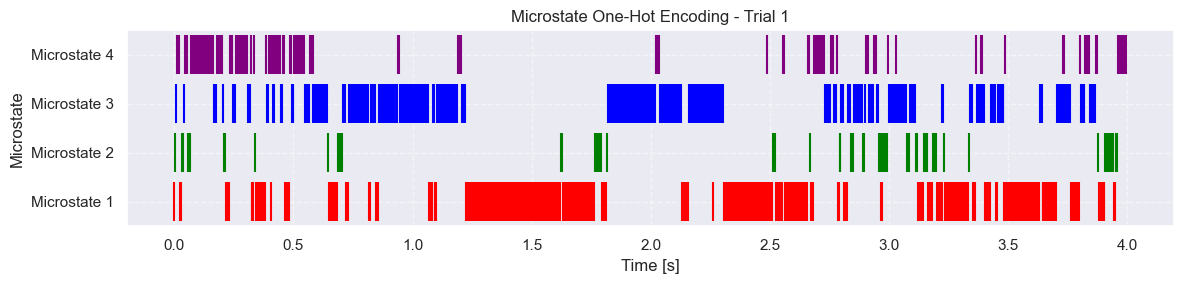

In [39]:


# Assuming all_microstate_labels_reshaped is already defined (shape: 200, 1000)
# Example:
# all_microstate_labels_reshaped = np.load("your_data.npy")

# Time vector (0 to 4 seconds, 1000 points)
time = timepoints

# Select the first trial microstate sequence
first_trial_labels = all_microstate_labels_reshaped[0]

# Find event times for each microstate label (0,1,2,3)
events = []
for state in range(4):
    # Indices where microstate equals the current state
    indices = np.where(first_trial_labels == state)[0]
    # Corresponding times
    event_times = time[indices]
    events.append(event_times)

# Plot eventplot
plt.figure(figsize=(12, 3))
plt.eventplot(events, colors=['red', 'green', 'blue', 'purple'], lineoffsets=[0,1,2,3], linelengths=0.8)

plt.yticks([0,1,2,3], labels=[f'Microstate {i+1}' for i in range(4)])
plt.xlabel('Time [s]')
plt.ylabel('Microstate')
plt.title('Microstate One-Hot Encoding - Trial 1')
plt.ylim(-0.5, 3.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


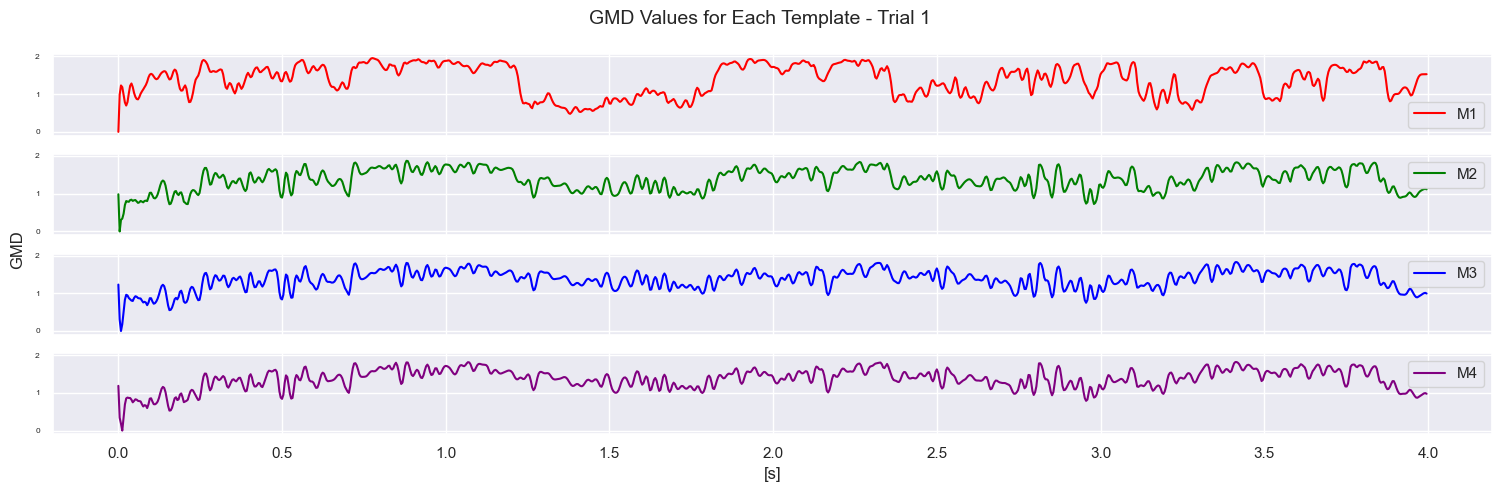

In [40]:
# plot first trials of GMD values for each template
fig, axes = plt.subplots(all_gmd_values_reshaped.shape[1],1, 
                         figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle('GMD Values for Each Template - Trial 1', fontsize=14)
axs = axes.flatten()
colors  =['red', 'green', 'blue', 'purple']
for i, ax in enumerate(axs):
    ax.plot(timepoints, all_gmd_values_reshaped[0, i], label=f'M{i+1}', color=colors[i])
    ax.set_ylabel(f'M{i+1}', rotation=0, labelpad=15, fontsize=8)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_ylabel('')
    ax.legend()
plt.xlabel('[s]')

# Add one centered y-label for the entire figure
fig.text(0, 0.5, 'GMD', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()

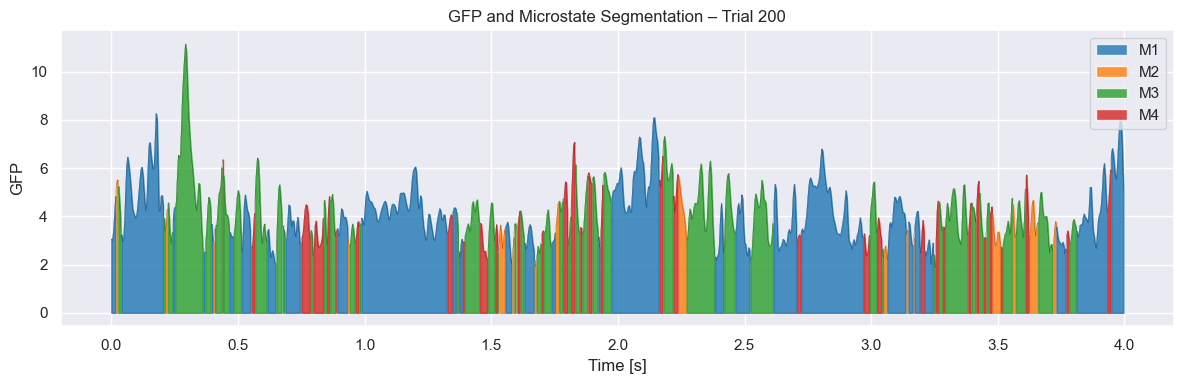

In [41]:
from matplotlib.patches import Patch

alpha = 0.8

# Pick a trial
trial_idx = 199  # 200th trial (0-indexed)

gfp = all_gfp[trial_idx]                  # shape: (1000,)
labels = all_microstate_labels_reshaped[trial_idx]  # shape: (1000,)

x = timepoints #np.arange(gfp.shape[0])  # time axis

# Define colors for microstates
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, gfp, color='black', linewidth=.1, label='GFP')

# Loop over contiguous segments with the same label
prev_label = labels[0]
start_idx = 0
for i in range(1, len(labels)):
    if labels[i] != prev_label:
        # Fill the previous segment
        ax.fill_between(x[start_idx:i], 0, gfp[start_idx:i], color=colors[prev_label], alpha=alpha)
        start_idx = i
        prev_label = labels[i]

# Fill the last segment
ax.fill_between(x[start_idx:], 0, gfp[start_idx:], color=colors[prev_label], alpha=alpha)

legend_handles = [Patch(facecolor=colors[i], alpha=alpha, label=f'M{i+1}') for i in range(4)]
ax.legend(handles=legend_handles, loc='upper right')

# Add legend to the plot
ax.legend(handles=legend_handles, loc='upper right')


ax.set_xlabel('Time [s]')
ax.set_ylabel('GFP')
ax.set_title(f'GFP and Microstate Segmentation – Trial {trial_idx + 1}')
plt.tight_layout()
plt.show()


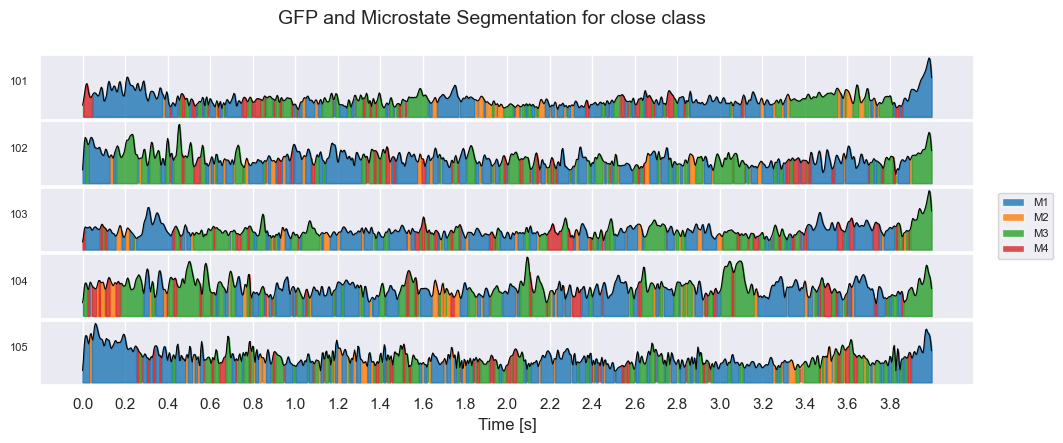

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n_trials_to_plot = 5
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Microstate colors

# Create subplots: 100 rows, 1 column
fig, axes = plt.subplots(n_trials_to_plot, 1, figsize=(10, n_trials_to_plot * 0.9), sharex=True)
fig.suptitle('GFP and Microstate Segmentation for close class', fontsize=14)

# Loop over trials
for trial_idx in range(n_trials_to_plot):
    idx = trial_idx  + 100
    ax = axes[trial_idx]
    gfp = all_gfp[idx]
    labels = all_microstate_labels_reshaped[idx]
    x = timepoints #np.arange(gfp.shape[0])

    # Plot GFP
    ax.plot(x, gfp, color='black', linewidth=0.8)

    # Fill under curve by microstate
    prev_label = labels[0]
    start_idx = 0
    for i in range(1, len(labels)):
        if labels[i] != prev_label:
            ax.fill_between(x[start_idx:i], 0, gfp[start_idx:i], color=colors[prev_label], alpha=0.8)
            start_idx = i
            prev_label = labels[i]
    # Final segment
    ax.fill_between(x[start_idx:], 0, gfp[start_idx:], color=colors[prev_label], alpha=0.8)

    # Minimal axis styling
    ax.set_yticks([])
    ax.set_ylabel(f'{idx+1}', rotation=0, labelpad=15, fontsize=8)
    ax.set_xticks([])

# Label only the bottom axis
axes[-1].set_xticks(timepoints[::50])  # Show every 100th time point
axes[-1].set_xlabel('Time [s]')

# add legend
legend_handles = [Patch(facecolor=colors[i], alpha=0.8, label=f'M{i+1}') for i in range(4)]

fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.subplots_adjust(hspace=0.3)  # Adjust vertical spacing




plt.tight_layout(h_pad=0.1)
plt.show()


In [43]:
# Create the DataFrame
df_microstates = pd.DataFrame({
    'Time': all_timepoints,       # Time at each point
    'GFP': all_gfp_combine,       # GFP value
    'Label': all_microstate_labels     # Assigned label from peaks
})

# Optional: convert label to readable names
label_names = ['m1', 'm2', 'm3', 'm4']
df_microstates['LabelName'] = [label_names[l] for l in df_microstates['Label']]

df_microstates.head()


Time       GFP  Label LabelName
0  0.000  3.595919      0        m1
1  0.004  4.066047      1        m2
2  0.008  5.650359      2        m3
3  0.012  5.906572      3        m4
4  0.016  5.579519      3        m4

### Extracting features for GFP time series

In [44]:
# 1. Identify microstate segments (continuous same labels)
df_microstates['Segment'] = (df_microstates['Label'] != df_microstates['Label'].shift()).cumsum()

# 2. Group by segment
segment_data = df_microstates.groupby('Segment').agg(
    Label=('Label', 'first'),
    Duration=('Time', lambda x: x.iloc[-1] - x.iloc[0] + 1/250)  # Add 1 sample = 0.004s
)

# 3. Mean duration (in seconds)
mean_duration = segment_data.groupby('Label')['Duration'].mean()

# 4. Occurrence per second
total_duration_sec = df_microstates['Time'].iloc[-1] - df_microstates['Time'].iloc[0] + 1/250
occurrence = segment_data['Label'].value_counts().sort_index()
occurrence_per_sec = occurrence / total_duration_sec

# 5. Time coverage ratio
coverage_ratio = segment_data.groupby('Label')['Duration'].sum() / total_duration_sec

# 6. Transition Probability
transitions = segment_data['Label'].to_numpy()
n_labels = df_microstates['Label'].nunique()
transition_counts = np.zeros((n_labels, n_labels))

for (a, b) in zip(transitions[:-1], transitions[1:]):
    transition_counts[a, b] += 1

transition_probs = transition_counts / transition_counts.sum(axis=1, keepdims=True)

# Optional: label names
label_names = ['m1', 'm2', 'm3', 'm4']
tp_df_microstates = pd.DataFrame(transition_probs, index=label_names, columns=label_names)


In [45]:
# Combine into long-form DataFrame for seaborn
feature_df = pd.DataFrame({
    'Label': mean_duration.index,
    'Mean Duration (s)': mean_duration.values,
    'Occurrence/sec': occurrence_per_sec.values,
    'Coverage Ratio': coverage_ratio.values
})

# Add readable labels
feature_df['LabelName'] = [label_names[i] for i in feature_df['Label']]


C:\Users\josan\AppData\Local\Temp\ipykernel_19612\839175985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='LabelName', y='Mean Duration (s)', palette=colors)
C:\Users\josan\AppData\Local\Temp\ipykernel_19612\839175985.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='LabelName', y='Occurrence/sec', palette=colors)
C:\Users\josan\AppData\Local\Temp\ipykernel_19612\839175985.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='LabelName', y='Coverage Ratio', palette=colors)


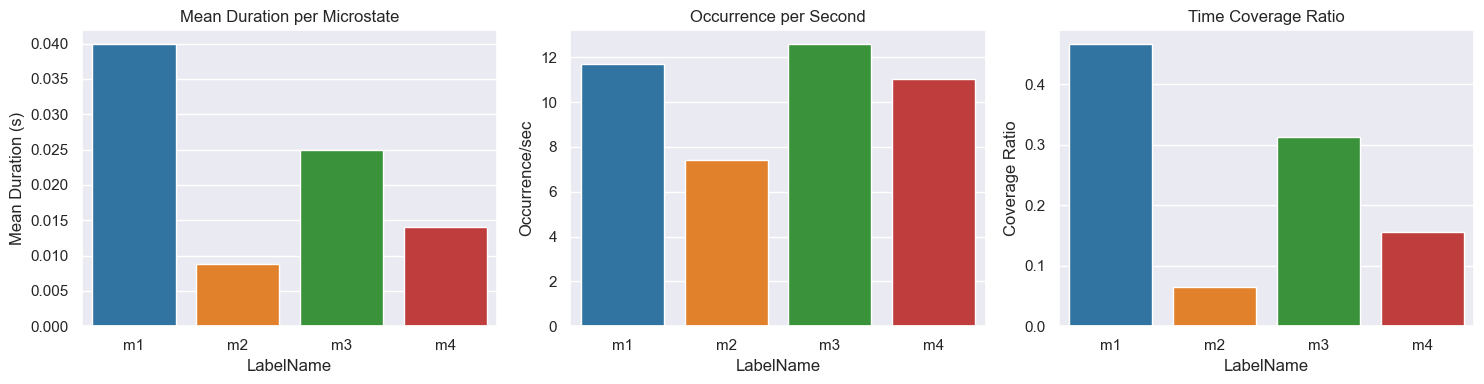

In [46]:

# Use same feature_df from before
feature_df = pd.DataFrame({
    'Label': mean_duration.index,
    'Mean Duration (s)': mean_duration.values,
    'Occurrence/sec': occurrence_per_sec.values,
    'Coverage Ratio': coverage_ratio.values
})
feature_df['LabelName'] = [label_names[i] for i in feature_df['Label']]

plt.figure(figsize=(15, 4))

# 1. Mean Duration
plt.subplot(1, 3, 1)
sns.barplot(data=feature_df, x='LabelName', y='Mean Duration (s)', palette=colors)
plt.title('Mean Duration per Microstate')

# 2. Occurrence/sec
plt.subplot(1, 3, 2)
sns.barplot(data=feature_df, x='LabelName', y='Occurrence/sec', palette=colors)
plt.title('Occurrence per Second')

# 3. Coverage Ratio
plt.subplot(1, 3, 3)
sns.barplot(data=feature_df, x='LabelName', y='Coverage Ratio', palette=colors)
plt.title('Time Coverage Ratio')

plt.tight_layout()
plt.show()


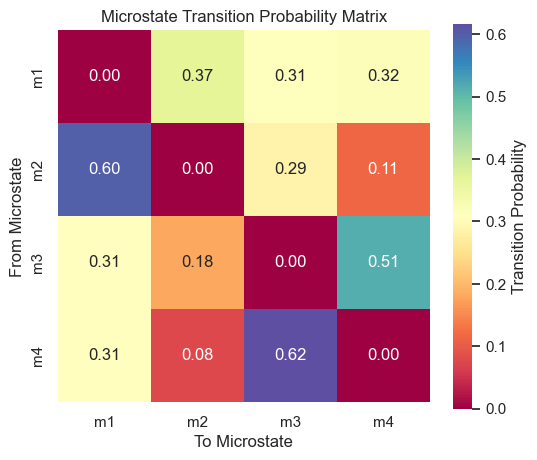

In [47]:
plt.figure(figsize=(6, 5))
sns.heatmap(tp_df_microstates, annot=True, cmap='Spectral', fmt=".2f", square=True,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Microstate Transition Probability Matrix')
plt.xlabel('To Microstate')
plt.ylabel('From Microstate')
plt.show()


In [48]:
feature_df['Segment'] = (feature_df['Label'] != feature_df['Label'].shift()).cumsum()
segment_data = feature_df.groupby('Segment').agg(
    Label=('Label', 'first'),
    Duration=('Time', lambda x: x.iloc[-1] - x.iloc[0] + 1/250)
)

label_names = ['m1', 'm2', 'm3', 'm4']

# Add readable label names for plotting
segment_data['LabelName'] = segment_data['Label'].apply(lambda x: label_names[x])

# Violin plot for Duration
plt.figure(figsize=(6, 4))
sns.violinplot(data=segment_data, x='LabelName', y='Duration', palette=colors)
plt.title('Distribution of Microstate Segment Durations')
plt.ylabel('Duration (seconds)')
plt.xlabel('Microstate')
plt.show()


KeyError: "Column(s) ['Time'] do not exist"

## y data

In [ ]:
y_file_path = data_path + folder_path + 'y_all.npy'
if os.path.exists(y_file_path):
    print('Label file exists')
y = np.load(y_file_path)
print('Label shape:', y.shape)


Label file exists
Label shape: (8960,)


In [ ]:
y

array([0., 0., 0., ..., 1., 1., 1.], shape=(8960,))

## Plotting Topography

In [ ]:
import mne

# Example EEG map (replace this with your actual 61-value array)
eeg_map = np.random.randn(61)  # shape: (61,)

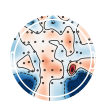

(<matplotlib.image.AxesImage at 0x230afa98e90>,
 <matplotlib.contour.QuadContourSet at 0x230ab9059d0>)

In [ ]:
rest_ch_ls = ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3',
                'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6',
                'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5',
                'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz',
                'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2']

# Create MNE Info object
sfreq = 1000  # arbitrary sample rate
info = mne.create_info(ch_names=rest_ch_ls, sfreq=sfreq, ch_types='eeg')

# Set montage to get electrode positions
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

# Plot the topomap
mne.viz.plot_topomap(eeg_map, info, show=True)

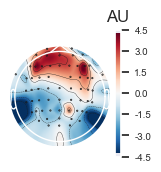

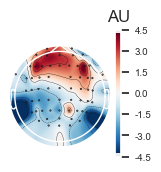

In [ ]:
import numpy as np
import mne

# Your cluster template, shape (61,)
eeg_map = np.array(cluster_templates[0])  # or whatever template you're plotting

# Create info with montage
sfreq = 1000  # arbitrary, not used for topo
info = mne.create_info(ch_names=rest_ch_ls, sfreq=sfreq, ch_types='eeg')
montage = mne.channels.make_standard_montage('standard_1020')  # or 'standard_1005' for higher density
info.set_montage(montage)

# Wrap in Evoked object
evoked = mne.EvokedArray(eeg_map[:, np.newaxis], info, tmin=0)

# Plot topomap with proper head shape
evoked.plot_topomap(times=0, time_format='', scalings=1, show=True)


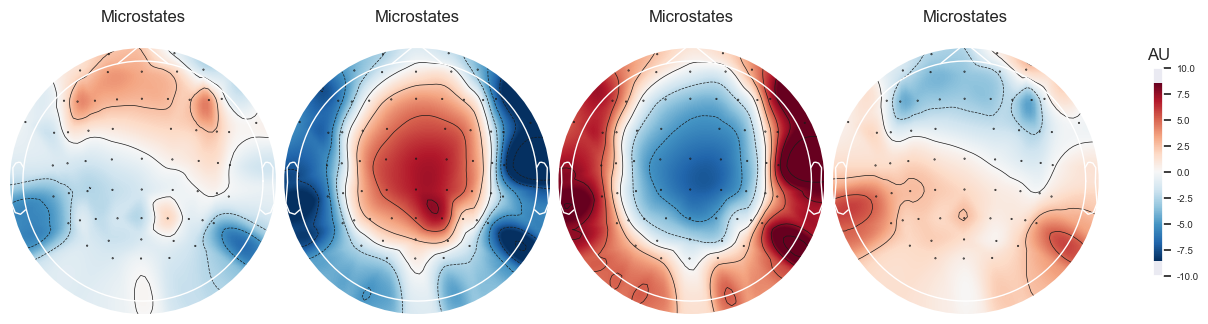

In [ ]:
# Set up MNE Info with standard montage
sfreq = 1000
info = mne.create_info(ch_names=rest_ch_ls, sfreq=sfreq, ch_types='eeg')
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

# Stack the maps to shape (61, 4) for plotting at 4 time points
data = np.stack(cluster_templates, axis=1)  # shape: (61, 4)

# Create EvokedArray with 4 time points (one per template)
evoked = mne.EvokedArray(data, info, tmin=0)

# Plot all 4 maps side by side
figure = evoked.plot_topomap(times='auto', time_format='Microstates', scalings=1,
                    cmap='RdBu_r', size=2, show= False)

In [ ]:
# get topographies of trials 200 at 1.2s
trial_idx = 199  # 200th trial (0-indexed)
example_toographies = []
example_toographies.append(cluster_templates[0])  # m1
np.asarray(example_toographies).shape

(1, 61)

In [ ]:
df.loc[trial_idx].values.shape  # (61, 1000)

# get topographies at 1.2s
time_idx = int(1.2 * sampling_rate)  # 1.2 seconds in samples
example_toographies.append(df.loc[trial_idx].values[:, time_idx])  # trial 200 at 1.2s
print('Example topographies shape:', np.asarray(example_toographies).shape)  # (2, 61)

Example topographies shape: (2, 61)


In [ ]:
example_toographies

[array([ 2.5167892 ,  2.8192391 ,  3.307006  ,  1.2204384 , -0.6658343 ,
         0.69626474,  0.87888724, -1.5399997 , -1.3722194 , -2.663465  ,
        -2.0618799 , -2.263167  , -2.128367  , -2.8645256 , -1.2625182 ,
        -0.509484  , -1.3542477 , -0.817055  , -3.1138258 ,  0.14906207,
        -0.49848765, -0.395104  ,  1.1551327 , -0.02626655,  0.2425615 ,
         2.3302643 ,  1.7437334 ,  2.3505812 ,  0.8215717 , -0.28441477,
         1.6951482 ,  3.6121738 ,  3.1565726 ,  2.9191523 ,  3.9580755 ,
        -1.4270744 ,  0.7083733 , -1.0221655 , -1.4074799 , -4.073401  ,
        -2.478841  , -1.6021265 , -1.1345012 , -1.2780926 , -1.8471236 ,
        -1.3646138 , -0.6026758 , -1.8794215 , -1.1408023 ,  1.7828581 ,
        -1.4192622 , -0.08611982, -0.39795646,  1.2726442 ,  0.5114075 ,
         2.0522394 ,  0.9340391 ,  4.2374225 , -1.4808174 ,  1.8878844 ,
         2.7411795 ], dtype=float32),
 array([  5.978963  ,   0.12552972,   4.803397  ,   4.76992   ,
          5.215425  , 

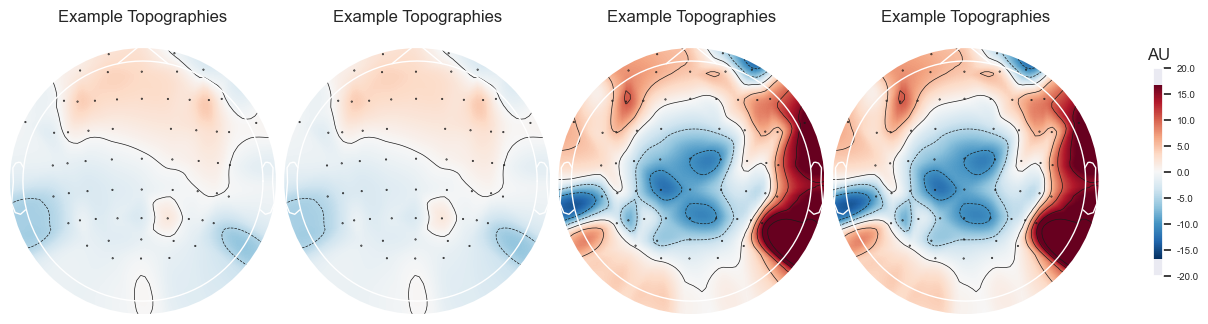

In [ ]:
# plot topographies
evoked_example = mne.EvokedArray(np.asarray(example_toographies).T, info, tmin=0)
# Plot the example topographies
_ = evoked_example.plot_topomap(times='auto', time_format='Example Topographies', scalings=1,
                             cmap='RdBu_r', size=2, show=True)
